# Plots

This is a Jupyter notebook used to generate the plots in the research.

In [1]:
import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt
import pandas            as pd

from mltools.libplot import get_counts
from os              import path, makedirs

# set parameters for matplotlib
%matplotlib inline
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# define absolute and relative paths
ROOT_DIR = '.' #-------------------------------------------------- root directory
IMG_DIR  = 'img' #------------------------------------------------ directory of images
IMG_PATH = path.join(ROOT_DIR, IMG_DIR, 'paper')

# create directories if non existent
if not path.isdir(IMG_PATH):
    makedirs(IMG_PATH, exist_ok=True)

## Distribution of $h_{11}$ and $h_{21}$

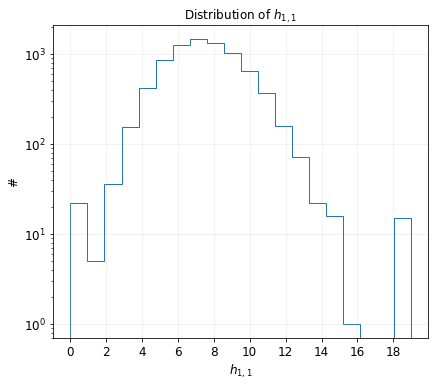

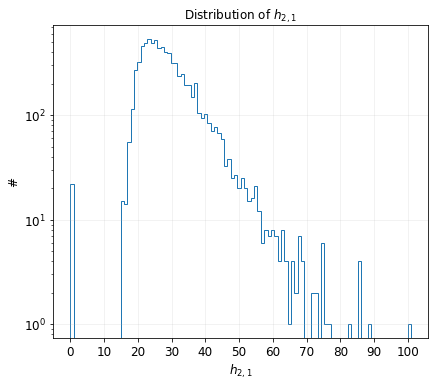

In [2]:
df  = pd.read_hdf(path.join(ROOT_DIR, 'cicy3f.h5'))
h11 = df['h11'] #----------------------------------------- extract h11 labels
h21 = df['h21'] #----------------------------------------- extract h21 labels

bins_h11 = np.max(h11) - np.min(h11) + 1
bins_h21 = np.max(h21) - np.min(h21) + 1

# create plot for h11
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{1,1}$')
ax.set_xlabel('$h_{1,1}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h11), np.max(h11) + 1, step=int(bins_h11 / 10), dtype=np.int))

ax.hist(h11, bins=bins_h11, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h11.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

# create plot for h21
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{2,1}$')
ax.set_xlabel('$h_{2,1}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h21), np.max(h21) + 1, step=int(bins_h21 / 10), dtype=np.int))

ax.hist(h21, bins=bins_h21, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h21.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

## Distribution of $h_{11}$ and $h_{21}$ w/o Product Spaces and Outliers

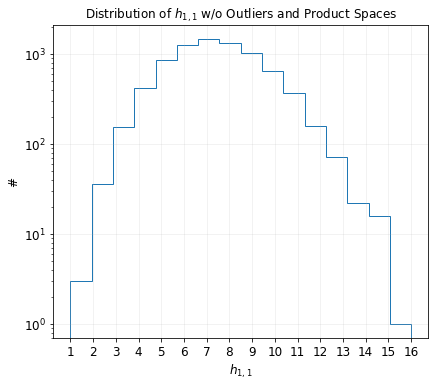

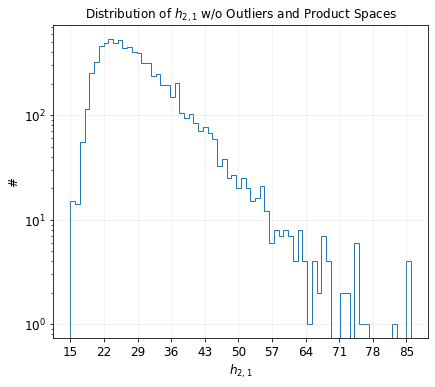

In [3]:
df_v2 = df.loc[df['isprod'] == 0] #------ remove product spaces
df_v2 = df_v2.loc[df['h11'] >= 1] #------ keep only 1 <= h11 <= 16
df_v2 = df_v2.loc[df['h11'] <= 16]
df_v2 = df_v2.loc[df['h21'] >= 1] #------ keep only 1 <= h21 <= 86
df_v2 = df_v2.loc[df['h21'] <= 86]

# extract the labels
h11 = df_v2['h11'] #----------------------------------------- extract h11 labels
h21 = df_v2['h21'] #----------------------------------------- extract h21 labels

bins_h11 = np.max(h11) - np.min(h11) + 1
bins_h21 = np.max(h21) - np.min(h21) + 1

# create plot for h11
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{1,1}$ w/o Outliers and Product Spaces')
ax.set_xlabel('$h_{1,1}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h11), np.max(h11) + 1, step=int(bins_h11 / 10), dtype=np.int))

ax.hist(h11, bins=bins_h11, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h11_noout_noprod.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

# create plot for h21
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{2,1}$ w/o Outliers and Product Spaces')
ax.set_xlabel('$h_{2,1}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h21), np.max(h21) + 1, step=int(bins_h21 / 10), dtype=np.int))

ax.hist(h21, bins=bins_h21, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h21_noout_noprod.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

## Correlation Matrix

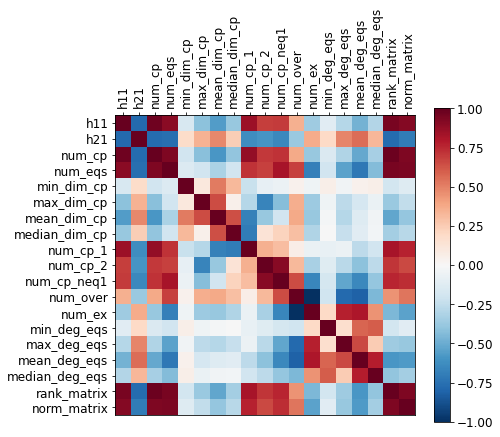

In [4]:
df_scal_corr = df_v2.select_dtypes(exclude='object').drop(columns=['euler', 'isprod', 'favour', 'kahlerpos'])

fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.xaxis.tick_top()
ax.set_xticks(np.arange(df_scal_corr.shape[1]))
ax.set_xticklabels(df_scal_corr.columns, rotation=90)
ax.set_yticks(np.arange(df_scal_corr.shape[1]))
ax.set_yticklabels(df_scal_corr.columns)

matshow = ax.imshow(df_scal_corr.corr(), cmap='RdBu_r')
cmap    = ax.figure.colorbar(matshow, ax=ax)

fig.savefig(path.join(IMG_PATH, 'corr_mat_favourable.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

## Distribution of $h_{11}$ and $h_{21}$ w.r.t. the Number of Projective Spaces

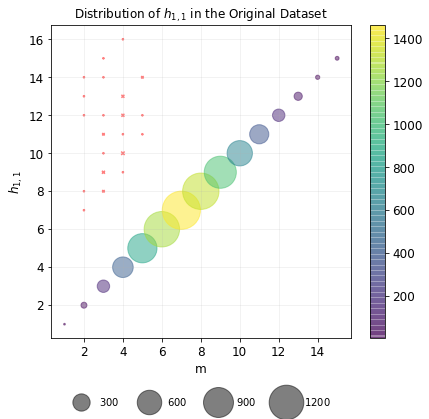

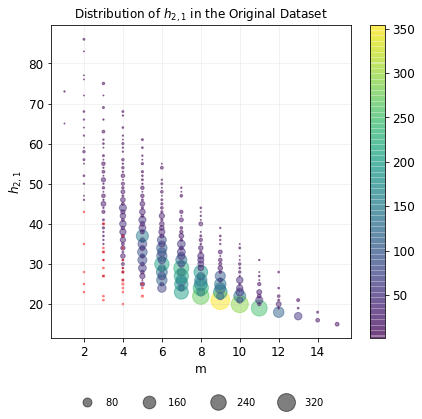

In [5]:
# extract data
data_h11_1 = np.array(list(get_counts(df_v2.loc[df_v2['favour'] == 1], 'h11', 'num_cp'))).T
data_h11_2 = np.array(list(get_counts(df_v2.loc[df_v2['favour'] == 0], 'h11', 'num_cp'))).T
data_h21_1 = np.array(list(get_counts(df_v2.loc[df_v2['favour'] == 1], 'h21', 'num_cp'))).T
data_h21_2 = np.array(list(get_counts(df_v2.loc[df_v2['favour'] == 0], 'h21', 'num_cp'))).T

# plot for h11
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)
ax.set_title('Distribution of $h_{1,1}$ in the Original Dataset')
ax.set_xlabel('m')
ax.set_ylabel('$h_{1,1}$')

scat = ax.scatter(x=data_h11_1[0], y=data_h11_1[1], s=data_h11_1[2], c=data_h11_1[2], alpha=0.5)
ax.scatter(x=data_h11_2[0], y=data_h11_2[1], s=data_h11_2[2]*3, alpha=0.5, marker='x', color='red')
cbar = ax.figure.colorbar(scat, ax=ax)

handles, labels = scat.legend_elements('sizes', num=5)
ax.legend(handles, labels, loc='lower center', ncol=np.shape(handles)[0], frameon=False, bbox_to_anchor=(0.5,-0.25))

fig.savefig(path.join(IMG_PATH, 'h11_distrib_favourable.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

# plot for h21
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)
ax.set_title('Distribution of $h_{2,1}$ in the Original Dataset')
ax.set_xlabel('m')
ax.set_ylabel('$h_{2,1}$')

scat = ax.scatter(x=data_h21_1[0], y=data_h21_1[1], s=data_h21_1[2], c=data_h21_1[2], alpha=0.5)
ax.scatter(x=data_h21_2[0], y=data_h21_2[1], s=data_h21_2[2]*3, alpha=0.5, marker='x', color='red')
cbar = ax.figure.colorbar(scat, ax=ax)

handles, labels = scat.legend_elements('sizes', num=5)
ax.legend(handles, labels, loc='lower center', ncol=np.shape(handles)[0], frameon=False, bbox_to_anchor=(0.5,-0.25))

fig.savefig(path.join(IMG_PATH, 'h21_distrib_favourable.pdf'), dpi=96, format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)